In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"oyewoleabisola","key":"ffe3ff1d7dffb3105b0036ae40615524"}'}

In [ ]:
from os import makedirs, path

# Use makedirs with exist_ok, it's available in older versions and works like mkdir with exist_ok
makedirs(name=path.expanduser('~/.kaggle'), mode=0o777, exist_ok=True)

# Continue with your code...
!cp kaggle.json ~/.kaggle/

#permission
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download murtozalikhon/brain-tumor-multimodal-image-ct-and-mri
! unzip /content/brain-tumor-multimodal-image-ct-and-mri.zip


Streaming output truncated to the last 5000 lines.
  inflating: Dataset/Brain Tumor MRI images/Healthy/mri_healthy (1).jpg  
  inflating: Dataset/Brain Tumor MRI images/Healthy/mri_healthy (10).jpg  
  inflating: Dataset/Brain Tumor MRI images/Healthy/mri_healthy (100).jpg  
  inflating: Dataset/Brain Tumor MRI images/Healthy/mri_healthy (1000).jpg  
  inflating: Dataset/Brain Tumor MRI images/Healthy/mri_healthy (1001).jpg  
  inflating: Dataset/Brain Tumor MRI images/Healthy/mri_healthy (1002).jpg  
  inflating: Dataset/Brain Tumor MRI images/Healthy/mri_healthy (1003).jpg  
  inflating: Dataset/Brain Tumor MRI images/Healthy/mri_healthy (1004).jpg  
  inflating: Dataset/Brain Tumor MRI images/Healthy/mri_healthy (1005).jpg  
  inflating: Dataset/Brain Tumor MRI images/Healthy/mri_healthy (1006).jpg  
  inflating: Dataset/Brain Tumor MRI images/Healthy/mri_healthy (1007).jpg  
  inflating: Dataset/Brain Tumor MRI images/Healthy/mri_healthy (1008).jpg  
  inflating: Dataset/Brain Tumo

In [ ]:
import os
import pandas as pd

dataset_root = "/content/Dataset"

image_files = []
classes = []

for folder_name in ["Brain Tumor CT scan Images", "Brain Tumor MRI images"]:
    folder_path = os.path.join(dataset_root, folder_name)
    print(f"Checking folder: {folder_path}")

    if os.path.exists(folder_path) and os.path.isdir(folder_path):
        for class_name in ["Healthy", "Tumor"]:
            class_path = os.path.join(folder_path, class_name)
            print(f"Checking class folder: {class_path}")

            if os.path.exists(class_path) and os.path.isdir(class_path):
                for image_file in os.listdir(class_path):
                    print(f"Found file: {image_file}")
                    if image_file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                        image_files.append(os.path.join(class_path, image_file))
                        classes.append(class_name)

data = {
    "ImageFile": image_files,
    "Class": classes
}
df = pd.DataFrame(data)

print(df.head())

Checking folder: /content/Dataset/Brain Tumor CT scan Images
Checking class folder: /content/Dataset/Brain Tumor CT scan Images/Healthy
Found file: ct_healthy (35).png
Found file: ct_healthy (1384).jpg
Found file: ct_healthy (253).jpg
Found file: ct_healthy (578).jpg
Found file: ct_healthy (1568).jpg
Found file: ct_healthy (1089).jpg
Found file: ct_healthy (1350).jpg
Found file: ct_healthy (486).jpg
Found file: ct_healthy (121).jpg
Found file: ct_healthy (450).png
Found file: ct_healthy (1072).jpg
Found file: ct_healthy (1376).jpg
Found file: ct_healthy (1581).jpg
Found file: ct_healthy (1110).jpg
Found file: ct_healthy (1055).jpg
Found file: ct_healthy (1184).jpg
Found file: ct_healthy (1004).jpg
Found file: ct_healthy (779).jpg
Found file: ct_healthy (1385).jpg
Found file: ct_healthy (1189).jpg
Found file: ct_healthy (264).png
Found file: ct_healthy (542).png
Found file: ct_healthy (457).png
Found file: ct_healthy (464).jpg
Found file: ct_healthy (397).png
Found file: ct_healthy (152

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9618 entries, 0 to 9617
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ImageFile  9618 non-null   object
 1   Class      9618 non-null   object
dtypes: object(2)
memory usage: 150.4+ KB


<Axes: xlabel='Class'>

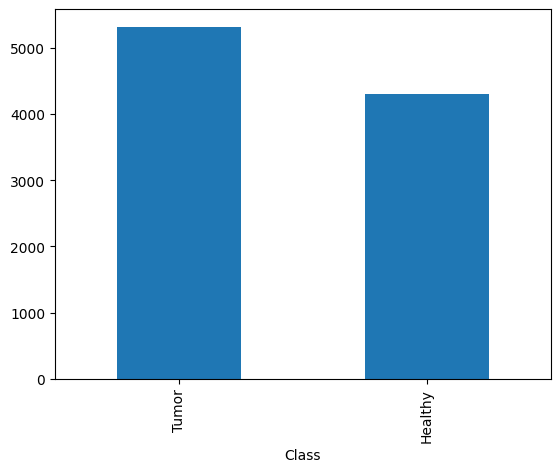

In [ ]:
df.Class.value_counts().plot(kind="bar")

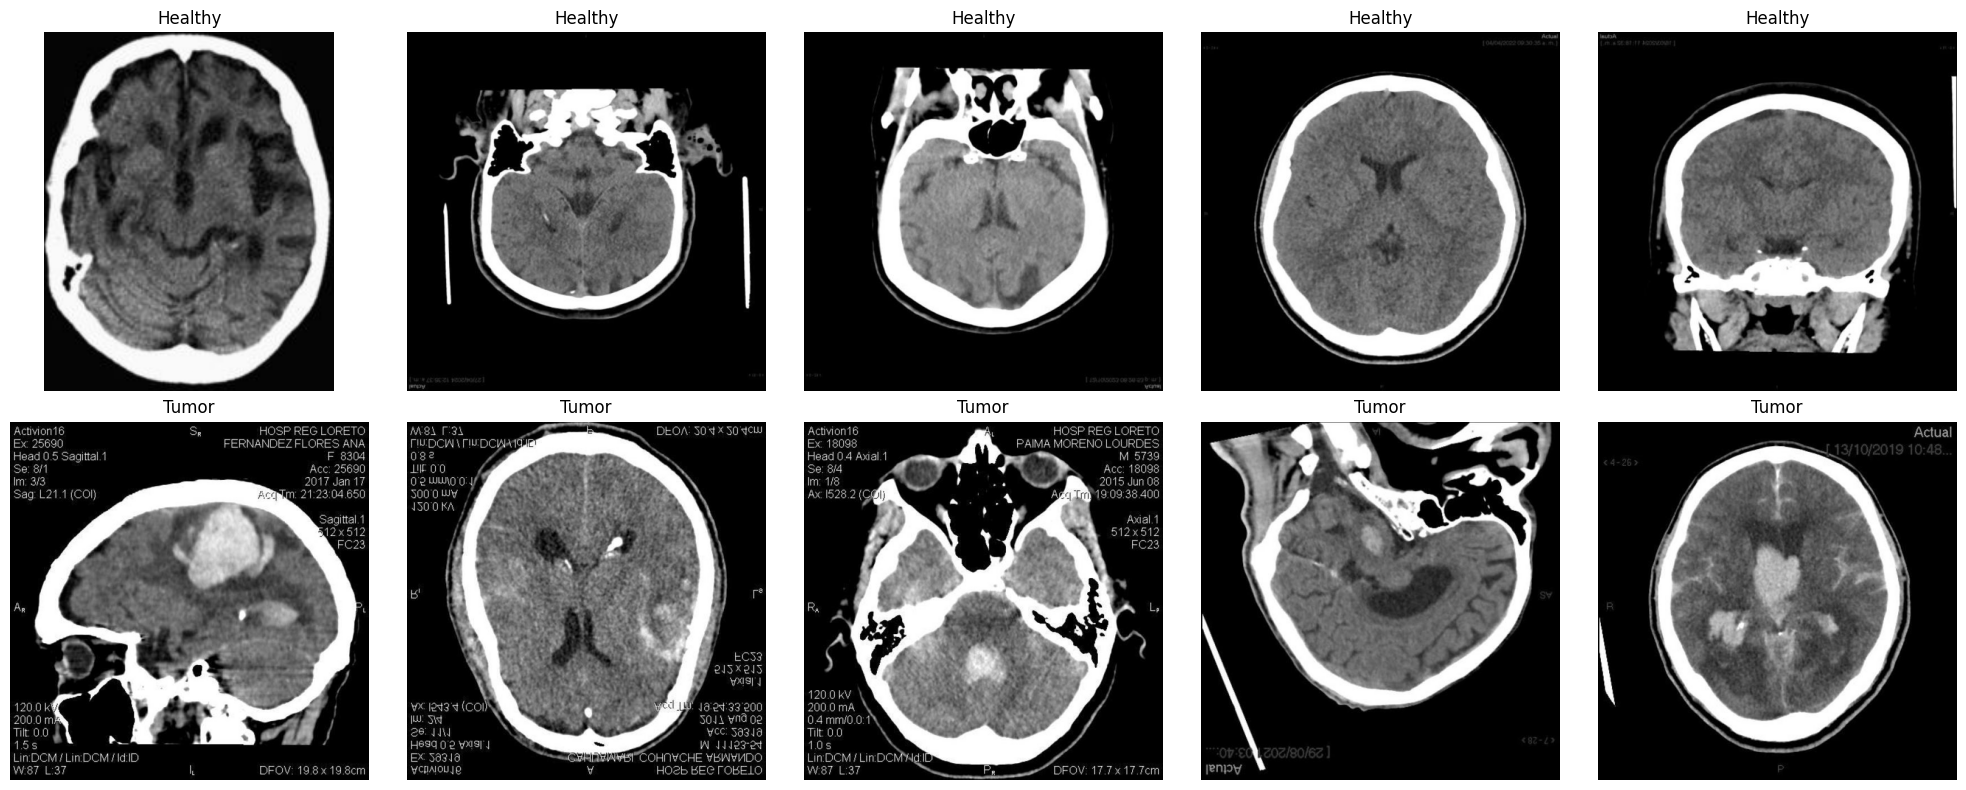

In [ ]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import os


# Create a subset of the dataframe with 5 Healthy and 5 Tumor images
healthy_df = df[df["Class"] == "Healthy"].head(5)
tumor_df = df[df["Class"] == "Tumor"].head(5)
subset_df = pd.concat([healthy_df, tumor_df])


fig, axes = plt.subplots(2, 5, figsize=(20, 8))  # Create a 2x5 grid of subplots

for i, (index, row) in enumerate(subset_df.iterrows()):
    image_path = row["ImageFile"]
    class_name = row["Class"]

    try:
        img = mpimg.imread(image_path)
        row_index = i // 5
        col_index = i % 5
        axes[row_index, col_index].imshow(img)
        axes[row_index, col_index].set_title(f"{class_name}")
        axes[row_index, col_index].axis('off') # Hide axes
    except FileNotFoundError:
        print(f"Error: Image file not found at {image_path}")
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")

plt.tight_layout()
plt.show()


In [ ]:
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torchvision import models, transforms, datasets
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [ ]:
root="/content/Dataset"
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
])
# Calculate mean and std for your dataset
dataset = datasets.ImageFolder(root=root,transform=transform )

loader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=False)
mean = 0.
std = 0.
for images, _ in loader:
    batch_samples = images.size(0)
    images = images.view(batch_samples, images.size(1), -1)
    mean += images.mean(2).sum(0)
    std += images.std(2).sum(0)

mean /= len(loader.dataset)
std /= len(loader.dataset)

print(f"Mean: {mean.item()}, Std: {std.item()}")

Mean: 0.2234388291835785, Std: 0.24283750355243683


In [ ]:
# Define the target image size for resizing
TARGET_SIZE = (224, 224)

# Define normalization values for pre-trained models in PyTorch
normalize=transforms.Normalize(mean=mean.item(),std=std.item())# For grayscale images

# Define the transformation pipeline
transform = transforms.Compose([
    transforms.Resize(TARGET_SIZE),
    transforms.Grayscale(num_output_channels=1),  # Convert to grayscale
    transforms.RandomRotation(degrees=20),        # Random rotation ±20 degrees
    transforms.RandomHorizontalFlip(p=0.5),      # Horizontal flip with 50% probability
    transforms.RandomVerticalFlip(p=0.5),        # Vertical flip with 50% probability
    transforms.ToTensor(),
    normalize
])

# Function to load and preprocess an image
def load_and_preprocess_image(image_path):
    try:
        # Open the image
        img = Image.open(image_path).convert('L')  # Convert to grayscale
        # Apply transformations
        img_tensor = transform(img)
        return img_tensor
    except Exception as e:
        print(f"Error loading image: {image_path}, Error: {e}")
        return None

In [ ]:
"""# Function to load, preprocess, and augment an image
def load_and_preprocess_image(image_path, num_augmentations=3):
    try:
        # Open the image
        img = Image.open(image_path).convert('L')  # Convert to grayscale

        # Apply transformations and generate augmented images
        augmented_images = []
        for _ in range(num_augmentations + 1):  # +1 for the original image
            augmented_img = transform(img)
            augmented_images.append(augmented_img)

        return augmented_images
    except Exception as e:
        print(f"Error loading image: {image_path}, Error: {e}")
        return None"""

In [ ]:
# Lists to store preprocessed images and their corresponding labels
preprocessed_images = []
labels = []

# Iterate through the DataFrame and preprocess each image
for idx, row in df.iterrows():
    image_path = row["ImageFile"]
    label = row["Class"]

    # Load and preprocess the image
    processed_images = load_and_preprocess_image(image_path)
    if processed_images is not None:
        for img_tensor in processed_images:
            preprocessed_images.append(img_tensor)
            labels.append(label)

# Convert the lists to tensors
X = torch.stack(preprocessed_images)  # Shape:
y = np.array(labels)  # Shape:

In [ ]:
import torch
import torch.nn as nn
from torchvision import models

# Load pre-trained ResNet50 model
model = models.resnet50(pretrained=True)

# Modify the first convolutional layer to accept 1-channel grayscale images
# Original layer: nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)

# Remove the last fully connected layer
model = nn.Sequential(*list(model.children())[:-1])  # Keep all layers except the final classifier

# Set the model to evaluation mode
model.eval()

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 159MB/s]


Sequential(
  (0): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)


In [ ]:
# Function to extract features using the pre-trained CNN
def extract_features(model, data, device):
    features = []
    with torch.no_grad():  # Disable gradient computation for inference
        for img in data:
            img = img.unsqueeze(0).unsqueeze(0).to(device)  # Add batch dimension and move to device
            # Extract features and convert to 4D
            feature = model(img)
            features.append(feature.cpu().numpy())  # Move to CPU and convert to NumPy
    return np.vstack(features).reshape(len(data), -1)  # Flatten features

# Extract features using the pre-trained ResNet50 model
print("Extracting features using ResNet50...")
features = extract_features(model, X, device)

# Print the shape of the extracted features
print("Features Shape:", features.shape)

Extracting features using ResNet50...
Features Shape: (9618, 2048)


In [ ]:
# Encode labels as integers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Create a DataFrame for the extracted features
feature_columns = [f"Feature_{i}" for i in range(features.shape[1])]
df_features = pd.DataFrame(features, columns=feature_columns)

# Add image file paths and labels to the DataFrame
df_features["ImageFile"] = df["ImageFile"] #.values.repeat(4)  # Repeat file paths for augmentations
df_features["Label"] = y_encoded

# Save the DataFrame to a CSV file
df_features.to_csv("extracted_features.csv", index=False)
print("Features saved to 'extracted_features.csv'")

Features saved to 'extracted_features.csv'


In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [18]:
'''class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-np.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)  # Shape: (1, max_len, d_model)
        self.register_buffer('pe', pe)

    def forward(self, x):
        # Add positional encoding to the input
        x = x + self.pe[:, :x.size(1), :]
        return x


class MultiHeadSelfAttention(nn.Module):
    def __init__(self, d_model, num_heads):
        super(MultiHeadSelfAttention, self).__init__()
        assert d_model % num_heads == 0, "d_model must be divisible by num_heads"

        self.d_model = d_model
        self.num_heads = num_heads
        self.depth = d_model // num_heads

        self.q_linear = nn.Linear(d_model, d_model)
        self.k_linear = nn.Linear(d_model, d_model)
        self.v_linear = nn.Linear(d_model, d_model)
        self.fc_out = nn.Linear(d_model, d_model)

    def split_heads(self, x):
        batch_size, seq_len, d_model = x.shape
        x = x.view(batch_size, seq_len, self.num_heads, self.depth)
        x = x.transpose(1, 2)  # Shape: (batch_size, num_heads, seq_len, depth)
        return x

    def forward(self, q, k, v):
        batch_size = q.size(0)

        # Linear transformations
        q = self.q_linear(q)  # Shape: (batch_size, seq_len, d_model)
        k = self.k_linear(k)
        v = self.v_linear(v)

        # Split heads
        q = self.split_heads(q)  # Shape: (batch_size, num_heads, seq_len, depth)
        k = self.split_heads(k)
        v = self.split_heads(v)

        # Scaled dot-product attention
        scores = torch.matmul(q, k.transpose(-2, -1)) / torch.sqrt(torch.tensor(self.depth, dtype=torch.float32))
        attention_weights = F.softmax(scores, dim=-1)
        attention_output = torch.matmul(attention_weights, v)

        # Combine heads
        attention_output = attention_output.transpose(1, 2).contiguous().view(batch_size, -1, self.d_model)

        # Final linear transformation
        output = self.fc_out(attention_output)
        return output

class FeedForwardNetwork(nn.Module):
  def __init__(self, d_model, d_ff):
        super(FeedForwardNetwork, self).__init__()
        self.fc1 = nn.Linear(d_model, d_ff)
        self.fc2 = nn.Linear(d_ff, d_model)

  def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class TransformerEncoderBlock(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, dropout=0.1):
        super(TransformerEncoderBlock, self).__init__()
        self.attention = MultiHeadSelfAttention(d_model, num_heads)
        self.ffn = FeedForwardNetwork(d_model, d_ff)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        # Multi-head self-attention with residual connection
        attn_output = self.attention(x, x, x)
        x = self.norm1(x + self.dropout(attn_output))

        # Feed-forward network with residual connection
        ffn_output = self.ffn(x)
        x = self.norm2(x + self.dropout(ffn_output))
        return x
class VisionTransformer(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, num_blocks, num_classes, dropout=0.1):
        super(VisionTransformer, self).__init__()
        self.positional_encoding = PositionalEncoding(d_model)
        self.encoder_blocks = nn.ModuleList([
            TransformerEncoderBlock(d_model, num_heads, d_ff, dropout) for _ in range(num_blocks)
        ])
        self.classification_head = nn.Linear(d_model, num_classes)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        # Add positional encoding
        x = self.positional_encoding(x)
        x = self.dropout(x)

        # Pass through transformer encoder blocks
        for block in self.encoder_blocks:
            x = block(x)

        # Take the [CLS] token representation for classification
        cls_token = x[:, 0, :]  # Assume the first token is the [CLS] token

        # Classification head
        output = self.classification_head(cls_token)
        return output
'''

'class PositionalEncoding(nn.Module):\n    def __init__(self, d_model, max_len=5000):\n        super(PositionalEncoding, self).__init__()\n        pe = torch.zeros(max_len, d_model)\n        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)\n        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-np.log(10000.0) / d_model))\n        pe[:, 0::2] = torch.sin(position * div_term)\n        pe[:, 1::2] = torch.cos(position * div_term)\n        pe = pe.unsqueeze(0)  # Shape: (1, max_len, d_model)\n        self.register_buffer(\'pe\', pe)\n\n    def forward(self, x):\n        # Add positional encoding to the input\n        x = x + self.pe[:, :x.size(1), :]\n        return x\n\n\nclass MultiHeadSelfAttention(nn.Module):\n    def __init__(self, d_model, num_heads):\n        super(MultiHeadSelfAttention, self).__init__()\n        assert d_model % num_heads == 0, "d_model must be divisible by num_heads"\n\n        self.d_model = d_model\n        self.num_heads = num

In [19]:
# Load the extracted features and labels from the CSV file
df_features = pd.read_csv("extracted_features.csv")

X_features = df_features.drop(columns=["ImageFile", "Label"]).values.astype(np.float32)
y_labels = df_features["Label"].values

# Encode labels as integers
le = LabelEncoder()
y_encoded = le.fit_transform(y_labels)

# Convert to PyTorch tensors
X = torch.tensor(X_features, dtype=torch.float32)
y = torch.tensor(y_encoded, dtype=torch.long)

In [20]:
X_train,Val_X,y_train,Val_y=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
x_val,x_test,y_val,y_test=train_test_split(Val_X,Val_y,test_size=0.5,random_state=42,stratify=Val_y)

#Create DataLoader
train_dataset=torch.utils.data.TensorDataset(X_train,y_train)
val_dataset=torch.utils.data.TensorDataset(x_val,y_val)
test_dataset=torch.utils.data.TensorDataset(x_test,y_test)

train_loader=torch.utils.data.DataLoader(train_dataset,batch_size=32,shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, drop_last=True)
test_loader=torch.utils.data.DataLoader(test_dataset,batch_size=32,shuffle=False)
print(len(train_dataset))
print(len(val_dataset))
print(len(test_dataset))

7694
962
962


In [21]:
import torch
import torch.nn as nn
import timm

class ViTForFeatureClassificationFromScratch(nn.Module):
    def __init__(self, num_classes, feature_dim, vit_name='vit_base_patch16_224'):
        super(ViTForFeatureClassificationFromScratch, self).__init__()

        # 1. Create base ViT model (modified for feature input)
        self.vit = timm.create_model(
            vit_name,
            pretrained=False,
            num_classes=0,
            in_chans=feature_dim,  # Set input channels to feature dimension
            img_size=1  # Treat features as 1x1 "images"
        )

        # 2. Replace patch embedding with feature adapter
        self.feature_adapter = nn.Sequential(
            nn.LayerNorm(feature_dim),
            nn.Linear(feature_dim, self.vit.embed_dim),
            nn.GELU()
        )

        # 3. Modify positional embedding for feature vectors
        self._init_positional_embedding()

        # 4. Classification head
        self.head = nn.Linear(self.vit.embed_dim, num_classes)

    def _init_positional_embedding(self):
        """Initialize positional embedding for single feature vector"""
        # Original ViT pos_embed shape: (1, num_patches + 1, embed_dim)
        # For features (treated as 1 patch + cls token), we need (1, 2, embed_dim)
        new_pos_embed = nn.Parameter(
            torch.zeros(1, 2, self.vit.embed_dim),
            requires_grad=True
        )
        nn.init.trunc_normal_(new_pos_embed, std=0.02)
        self.vit.pos_embed = new_pos_embed

    def forward(self, features):
        # Input shape: (batch_size, feature_dim)
        features = features.unsqueeze(-1).unsqueeze(-1)  # Add spatial dims (b,c,1,1)

        # Adapt features to ViT dimensions
        x = self.feature_adapter(features.squeeze())  # (b, embed_dim)
        x = x.unsqueeze(1) # (b,1, embed_dim)

        # Add class token
        cls_token = self.vit.cls_token.expand(x.shape[0], -1, -1)
        x = torch.cat((cls_token, x), dim=1)  # (b, 2, embed_dim)

        # Add positional embedding
        x = x + self.vit.pos_embed

        # Process through transformer blocks
        x = self.vit.blocks(x)
        x = self.vit.norm(x)

        # Use class token for classification
        return self.head(x[:, 0])

# Example usage
feature_dim = 2048
num_classes = 2
vit_model = ViTForFeatureClassificationFromScratch(num_classes, feature_dim)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vit_model.to(device)

ViTForFeatureClassificationFromScratch(
  (vit): VisionTransformer(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(2048, 768, kernel_size=(16, 16), stride=(16, 16))
      (norm): Identity()
    )
    (pos_drop): Dropout(p=0.0, inplace=False)
    (patch_drop): Identity()
    (norm_pre): Identity()
    (blocks): Sequential(
      (0): Block(
        (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (q_norm): Identity()
          (k_norm): Identity()
          (attn_drop): Dropout(p=0.0, inplace=False)
          (proj): Linear(in_features=768, out_features=768, bias=True)
          (proj_drop): Dropout(p=0.0, inplace=False)
        )
        (ls1): Identity()
        (drop_path1): Identity()
        (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): Mlp(
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (act

In [22]:
# Hyperparameters
def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        if m.bias is not None:
            nn.init.zeros_(m.bias)


vit_model.apply(init_weights)
optimizer = torch.optim.AdamW(vit_model.parameters(), lr=0.001,weight_decay=0.01)
criterion = nn.CrossEntropyLoss()
scheduler=torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.1)
torch.nn.utils.clip_grad_norm_(vit_model.parameters(), max_norm=1.0)

best_val_loss = float('inf')
patience = 5
trigger_times = 0


train_loss=[]
val_loss=[]
train_acc=[]
val_acc=[]
# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    vit_model.train()
    train_running_loss = 0.0
    train_correct = 0
    train_total = 0

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = vit_model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        _, predicted = torch.max(output.data, 1)
        train_running_loss += loss.item()
        train_total += target.size(0)
        train_correct += (predicted == target).sum().item()
    train_epoch_loss=train_running_loss/len(train_loader)
    train_epoch_acc=100 * train_correct / train_total
    train_loss.append(train_epoch_loss)
    train_acc.append(train_epoch_acc)
    # evaluation
    vit_model.eval()
    val_running_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
      for batch_idx, (data, target) in enumerate(val_loader):
        if batch_idx==len(val_loader)-1:
          print(f'Last batch size:{data.shape[0]}')
        data, target = data.to(device), target.to(device)
        output = vit_model(data)
        loss = criterion(output, target)
        val_running_loss += loss.item()
        _, predicted = torch.max(output.data, 1)
        # Update total and correct for accuracy calculation
        val_total += target.size(0)
        val_correct += (predicted == target).sum().item()
      val_epoch_loss=val_running_loss/len(val_loader)
      val_epoch_acc=100 * val_correct / val_total
      val_loss.append(val_epoch_loss)
      val_acc.append(val_epoch_acc)

    # Print for the epoch
      print(f'Epoch {epoch+1}/{num_epochs}, Loss: {train_running_loss/len(train_loader)}, Accuracy: {100 * train_correct / train_total}')
      print(f'Epoch {epoch+1}/{num_epochs}, Loss: {val_loss}, Accuracy: {100 * val_correct / val_total}')

# Save the model
save_path = '/content/fTVIT'
print(f'Saving model in {save_path}')
torch.save(vit_model.state_dict(), "ftvit_model.pth")







Last batch size:32
Epoch 1/10, Loss: 0.9949093846859279, Accuracy: 50.90979984403431
Epoch 1/10, Loss: [0.7053906420866648], Accuracy: 44.791666666666664
Last batch size:32
Epoch 2/10, Loss: 0.6482284407274357, Accuracy: 60.13776969066805
Epoch 2/10, Loss: [0.7053906420866648, 0.4153305103381475], Accuracy: 82.08333333333333
Last batch size:32
Epoch 3/10, Loss: 0.39753960137916305, Accuracy: 83.4806342604627
Epoch 3/10, Loss: [0.7053906420866648, 0.4153305103381475, 0.38243487377961477], Accuracy: 85.52083333333333
Last batch size:32
Epoch 4/10, Loss: 0.2931612450243032, Accuracy: 88.23758773069925
Epoch 4/10, Loss: [0.7053906420866648, 0.4153305103381475, 0.38243487377961477, 0.25788542603453], Accuracy: 89.89583333333333
Last batch size:32
Epoch 5/10, Loss: 0.2521769875946505, Accuracy: 89.99220171562256
Epoch 5/10, Loss: [0.7053906420866648, 0.4153305103381475, 0.38243487377961477, 0.25788542603453, 0.4328183556596438], Accuracy: 83.95833333333333
Last batch size:32
Epoch 6/10, Loss

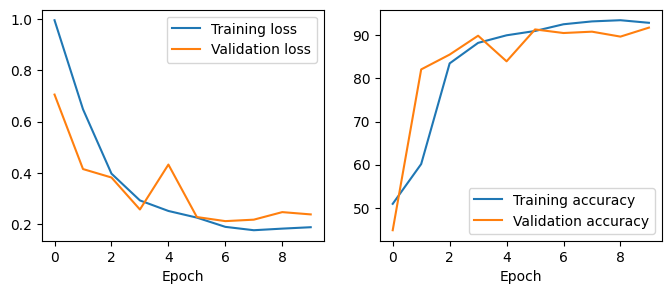

In [23]:
# Plot model performance accros the epochs
f, ax = plt.subplots(1, 2, figsize=(8, 3))

ax[0].plot(train_loss, label='Training loss')
ax[0].plot(val_loss, label='Validation loss')
ax[0].set_xlabel('Epoch')
ax[0].legend()

ax[1].plot(train_acc ,label='Training accuracy')
ax[1].plot(val_acc, label='Validation accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend()

f.show()

<ipython-input-24-79551fd900d2>:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vit_model.load_state_dict(torch.load(save_path))


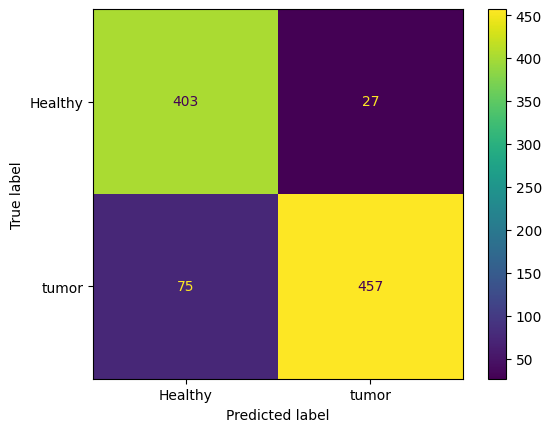

In [24]:
from sklearn import metrics

# Test
save_path = '/content/ftvit_model.pth'

# Load the ViT model (instead of the ResNet model)
vit_model = ViTForFeatureClassificationFromScratch(num_classes=2, feature_dim=2048) # Assuming your feature dim and num_classes
vit_model.load_state_dict(torch.load(save_path))
vit_model.to(device) # Move to the correct device
vit_model.eval()

predictions_list = []
with torch.no_grad():
  for batch_idx, (data, target) in enumerate(test_loader):
        data, target = data.to(device), target.to(device)
        output = vit_model(data)
        _, predicted = torch.max(output, 1)
        predictions_list.extend(predicted.tolist())

y_true = np.array([el[1] for el in test_dataset])
y_pred = np.array(predictions_list)

confusion_mat = metrics.confusion_matrix(y_true, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=['Healthy', 'tumor'])
cm_display.plot()

In [25]:
from sklearn.metrics import precision_score, f1_score, recall_score
accuracy = metrics.accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.8940
Precision: 0.9442
F1-score: 0.8996
Recall: 0.8590
